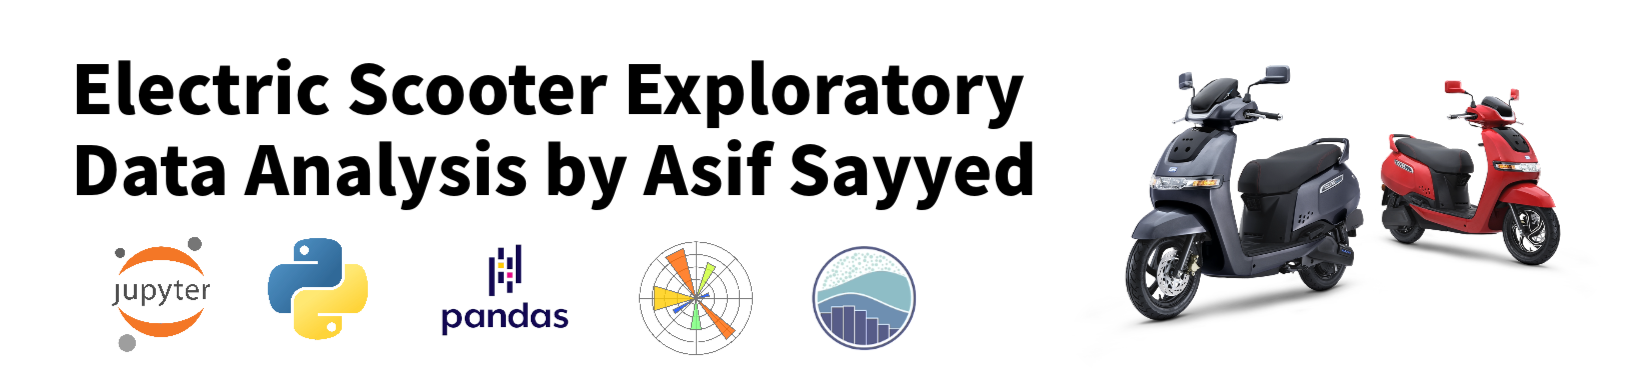

In [27]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('husl',9)

In [28]:
# viewing and trying out the color palette (for visualisation)
sns.color_palette('husl',9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

In [29]:
# reading the data
df = pd.read_csv('ev_cleaned_data.csv')
df.head()

,name,price,rating,company,rating_count,review_count
0,Bounce Infinity E1 Limited Edition Booking for...,114208,4.0,Bounce Infinity,40,12
1,Joy e-bike Wolf Eco Booking for Ex-Showroom Pr...,91350,4.4,Joy,28,7
2,OKAYA Faast F2B Booking for Ex-Showroom Price ...,99950,4.3,OKAYA,594,92
3,BGauss BG C12i MAX Booking for Ex-Showroom Pri...,126153,4.2,BGauss,49,5
4,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,145900,4.2,VIDA,217,39


In [30]:
df.tail()

,name,price,rating,company,rating_count,review_count
71,OKAYA ClassIQ Booking for Ex-Showroom Price (w...,74499,4.0,OKAYA,4,0
72,BGauss BG D15 Pro Booking for Ex-Showroom Pric...,145651,3.5,BGauss,6,4
73,BGauss BG B8 Booking for Ex-Showroom Price (Wi...,50000,3.6,BGauss,22,5
74,OKAYA Faast F3 Booking for Ex-Showroom Price (...,124990,3.7,OKAYA,3,0
75,Bounce Infinity E1 Booking for Ex-Showroom Pri...,80490,4.0,Bounce Infinity,96,31


In [31]:
# checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          76 non-null     object 
 1   price         76 non-null     int64  
 2   rating        76 non-null     float64
 3   company       76 non-null     object 
 4   rating_count  76 non-null     int64  
 5   review_count  76 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.7+ KB


Here we have <b>six</b> columns, <b>two</b> contain categorical data and <b>four</b> contain numeric data 
- Numerical Columns: `Price`, `Rating`, `Rating Count`, `Review Count` </li>
- Categorical Columns: `Company`, `Name` </li>

In [32]:
# viewing the summary statistics of the data
df.describe()

,price,rating,rating_count,review_count
count,76.000000,76.000000,76.000000,76.000000
mean,112841.078947,3.969737,74.039474,12.513158
std,24026.096180,0.260778,130.258967,19.908118
min,50000.000000,3.500000,3.000000,0.000000
25%,99950.000000,3.800000,6.000000,1.000000
50%,109604.000000,4.000000,22.000000,5.000000
75%,132990.000000,4.200000,49.000000,12.000000
max,146355.000000,4.400000,594.000000,92.000000


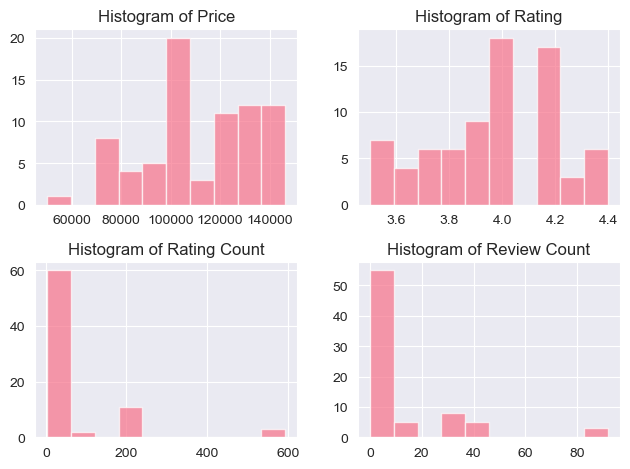

In [33]:
# creating subplot of multiple histograms
fig, axs = plt.subplots(2,2)

# creating histogram for price column
axs[0,0].hist(df['price'], alpha = 0.7)
# setting title for price histogram
axs[0,0].set_title("Histogram of Price")

# creating histogram for rating column
axs[0,1].hist(df['rating'], alpha = 0.7)
# setting title for rating histogram
axs[0,1].set_title("Histogram of Rating")

# creating histogram for rating_count column
axs[1,0].hist(df['rating_count'], alpha = 0.7)
# setting title for rating_count histogram
axs[1,0].set_title("Histogram of Rating Count")

# creating histogram for review_count column
axs[1,1].hist(df['review_count'], alpha = 0.7)
# setting title for review_count histogram
axs[1,1].set_title("Histogram of Review Count")

# adjust the padding around the subplot
plt.tight_layout()
plt.show()

**Inference:**
- `price` column is sligtly left skewed
- `rating` column is slightly right skewed
- `rating_count` column is right skewed
- `review_count` column is right skewed 

### Checking the frequency of listings by each company

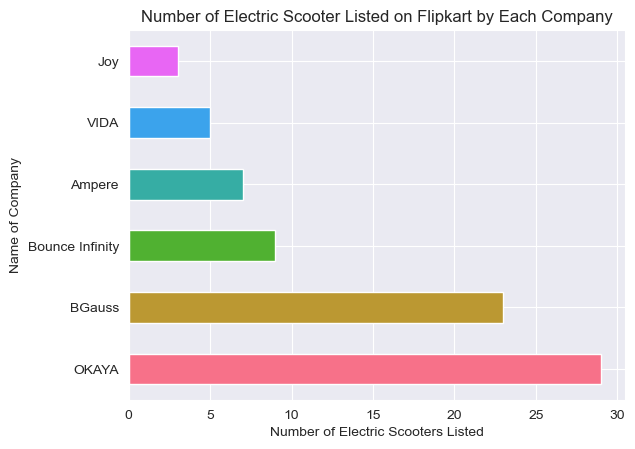

In [35]:
# creating a horizontal bargraph of the frequency of listings made by every company on Flipkart
c_list = sns.color_palette('husl')
df.company.value_counts().plot( kind= 'barh', color = c_list);
plt.title("Number of Electric Scooter Listed on Flipkart by Each Company")
plt.xlabel('Number of Electric Scooters Listed')
plt.ylabel('Name of Company')
plt.show()

This graph shows the side-by-side comparison of the amount of listings made by each product on FlipKart

In terms of company:
- Okaya has the most Electric Scooters listed on Flipkart.
- BGauss at second place.
- Joy being the least in terms of number.

### Finding the correlation between numeric variables using heatmap
Why this plot?
We created this heatmap to quickly get a overview of how the numeric columns like `price`,`rating`,`rating_count`,`review_count` are correlated to each other
- If the correlation is in the `positive` i.e more than zero, that means those columns have a **positive correlation** 
    i.e if column X increases column Y will also increase. 
- If the correlation is in the `negative` i.e less than zero, that means those columns have a **negative correlation** i.e if column Y increases column Y will decrease.
- If the correlation is `zero` then that means those columns have **no correlation** i.e if column X changes column Y should not change in regards to that change
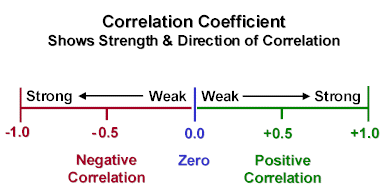
- If the correlation lies between **0 and 0.5** in either positive or negative direction, it is considered `weak correlation`
- If the correlation lies between **0.5 to 1** in either positive or negative direction, it is considered `strong correlation`

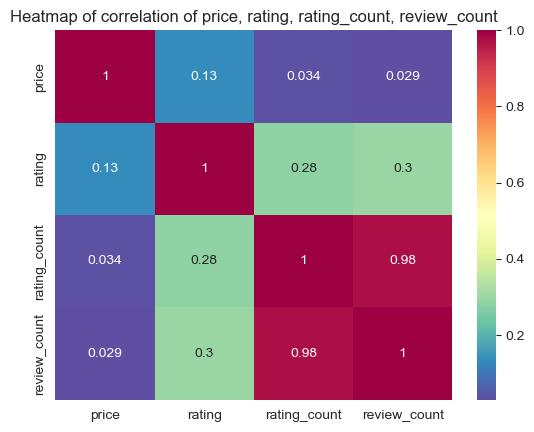

In [67]:
# making a heatmap of price column,rating column,rating_count column and review_count column
sns.heatmap(df[['price','rating', 'rating_count','review_count']].corr(),
            annot=True, cmap= 'Spectral_r')
plt.title('Heatmap of correlation of price, rating, rating_count, review_count')
plt.show()

**Inference:**
- `price` and `rating` column have __weak positive correlation__ (0.13)
- `rating` and `review_count` columm have __weak positive correlation__ (0.3)
- `rating_count` and `review_count` columns have __strong positive correlarion__ (0.98)

### Checking the average price of each electric scooter price

In [43]:
# looking at the average price, rating and rating_count of each company
df.groupby('company')[['price','rating','rating_count']].agg('mean').sort_values(
    ['rating', 'rating_count'])

,price,rating,rating_count
company,,,
Ampere,122095.000000,3.885714,71.142857
Bounce Infinity,100400.000000,3.933333,102.666667
Joy,89250.000000,3.966667,24.666667
OKAYA,106196.862069,3.968966,71.241379
BGauss,119239.043478,3.982609,43.260870
VIDA,145540.000000,4.100000,214.000000


**Inference:**
- __Joy__ has the lowest average price of electric scooters i.e `89K`
- __VIDA__ has the highest average price of electric scooters i.e `145K`
- The __average rating__ of electric scooter brands aren't that varied, it ranges from `3.88` to `4.10`
- The least is __Ampere__ coming at `3.88`
- The most is __VIDA__ coming at `4.10`

Here you can see as __VIDA__ has the highest average price at `145540` but it also has average of `4.1` stars of rating and a whopping average of `214` reviews hence making it expensive yet the safest choice to make if you want to purchase an EV

Another good pick would be __Bounce Infinity__ as it is trailing __VIDA__ in both average pricing at `122095`, average rating at `3.93` and average of rating_count at `102`

### Let's try to visuals the companies in terms of average price

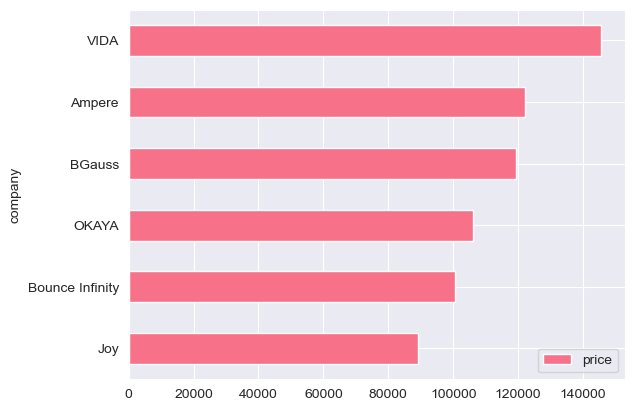

In [61]:
# creating a groupby of company and mean of price sorted by price and then making a horizontal bargraph
df.groupby('company')[['price']].agg('mean').sort_values('price').plot(
    kind = 'barh')
plt.show()

- Here you can see the big difference between **VIDA** and **Bounce Infinity** in terms of average of price
- If you are looking to spend on a good Electric Vehicle then you can go for **VIDA** and if you are looking for an Electric Vehicle that is comparitively cheaper on average with significantly higher `rating` and `rating_count` then others in that case **Bounce Infinity** would be the one

### Making a scatter plot to see how price and rating count are related

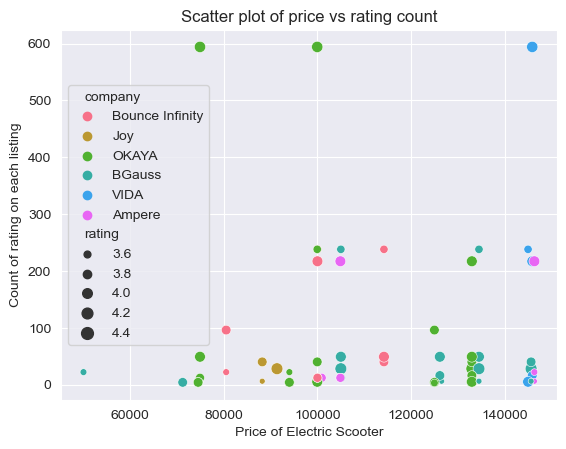

In [76]:
# making a scatter plot
sns.scatterplot(df,x='price',y='rating_count', hue='company', size='rating', palette='husl')
plt.xlabel('Price of Electric Scooter')
plt.ylabel('Count of rating on each listing')
plt.title('Scatter plot of price vs rating count')
plt.show()

**Inference:**
We can see that count of rating increases as price increases but as we cross the 100,000 mark, the growth plateaus with a few exceptions

<strong>Author</strong> <br>
Asif Sayyed<hr>
<b> Thanks for reading my code, ⭐ Star my repository if you find it useful </b><br>
<div>
    <li><a href="https://www.linkedin.com/in/sayyedasif/">LinkedIn</a></li>
    <li><a href="https://www.credly.com/users/asif-sayyed.fef49659/badges">Credly</a></li>
    <li><a href="https://asifdotexe.github.io/">Portfolio</a></li>
<div>